In [ ]:
import pandas as pd
import numpy as np
import random

## Generation of our dataset

# Dimensions of the CSV file
rows, cols = 400, 200 # I had to make the dataset smaller to be able to compute everything

# Create an empty DataFrame
df = pd.DataFrame('', index=range(1, rows + 1), columns=[f'Session {i}' for i in range(1, cols + 1)])

# Define the four different entries
entries = ["Yes", "No", "Obstruction", "Abstention"]

# Populate each column with up to 513 entries
for col in range(1, cols + 1):

    # Randomly choose rows to fill
    num_entries = min(513, rows) # the max number per session is 513, but here it won't matter since we're taking only 400 legislators
    selected_rows = random.sample(range(1, rows + 1), num_entries)

    # Fill the selected rows with random choices from the entries
    for row in selected_rows:
        df.at[row, f'Session {col}'] = random.choice(entries)

# Save the DataFrame as a CSV file
csv_file_path = 'voting_records_Sample.csv'
df.to_csv(csv_file_path)

df.head()





,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6,Session 7,Session 8,Session 9,Session 10,...,Session 191,Session 192,Session 193,Session 194,Session 195,Session 196,Session 197,Session 198,Session 199,Session 200
1,Yes,Obstruction,Yes,Abstention,No,Yes,Obstruction,Obstruction,No,No,...,Yes,Obstruction,No,Abstention,No,No,No,Yes,Abstention,Abstention
2,Yes,Abstention,No,No,No,Yes,Yes,Obstruction,Yes,Abstention,...,Obstruction,Yes,Obstruction,Abstention,Obstruction,No,Obstruction,Obstruction,Obstruction,No
3,Abstention,Obstruction,No,Abstention,Yes,Yes,Yes,Obstruction,No,Yes,...,Yes,Yes,Abstention,Yes,No,No,No,Abstention,Abstention,Yes
4,No,Obstruction,Abstention,Yes,No,No,Yes,Abstention,Abstention,Abstention,...,Obstruction,Yes,Yes,Obstruction,Yes,Obstruction,Obstruction,Yes,Yes,Obstruction
5,No,Obstruction,Obstruction,Abstention,Abstention,Yes,Yes,No,Obstruction,Abstention,...,Abstention,Abstention,No,Obstruction,Abstention,No,Abstention,No,No,Obstruction


In [ ]:
# In this code, we generated a random dataset with some similar entries to be able to detect corruption because in the previous code all elements of weighted matrix were negative
import pandas as pd
import numpy as np
import random

# Dimensions of the CSV file
rows, cols = 400, 125

# Create an empty DataFrame
df = pd.DataFrame('', index=range(1, rows + 1), columns=[f'Session {i}' for i in range(1, cols + 1)])

# Define the four different entries
entries = ["Yes", "No", "Obstruction", "Abstention"]

# Randomly choose 10 rows to have similar entries
rows_with_similar_entries = random.sample(range(1, rows + 1), 35)

# Randomly choose a common pattern for all sessions
common_pattern = random.choice(entries)

# Populate each column with up to 513 entries
for col in range(1, cols + 1):
    # Use the common pattern for the selected rows
    for row in rows_with_similar_entries:
        df.at[row, f'Session {col}'] = common_pattern

    # Fill the remaining rows with random entries
    for row in range(1, rows + 1):
      if row in rows_with_similar_entries:
        continue
      else:
          df.at[row, f'Session {col}'] = random.choice(entries)

# Save the DataFrame as a CSV file
csv_file_path = 'voting_records_Sample_with_similar_entries.csv'
df.to_csv(csv_file_path)

df.head()



,Session 1,Session 2,Session 3,Session 4,Session 5,Session 6,Session 7,Session 8,Session 9,Session 10,...,Session 116,Session 117,Session 118,Session 119,Session 120,Session 121,Session 122,Session 123,Session 124,Session 125
1,No,No,No,Abstention,Yes,Obstruction,No,No,Abstention,Abstention,...,Abstention,Yes,Yes,Obstruction,Obstruction,Obstruction,Obstruction,Obstruction,No,Obstruction
2,No,Obstruction,Abstention,No,Yes,Abstention,Obstruction,Abstention,Abstention,Abstention,...,No,Abstention,No,Yes,Yes,Obstruction,Abstention,Yes,No,Obstruction
3,No,Obstruction,No,Obstruction,No,Abstention,Obstruction,Yes,Obstruction,Obstruction,...,No,Obstruction,Abstention,Obstruction,Abstention,Obstruction,Obstruction,No,No,Obstruction
4,No,Abstention,No,No,Abstention,No,Abstention,Obstruction,No,Obstruction,...,No,Abstention,Obstruction,Abstention,Yes,No,Yes,Yes,No,Abstention
5,Abstention,Obstruction,No,Abstention,Abstention,Yes,Yes,No,Obstruction,No,...,Yes,Abstention,Obstruction,Obstruction,Abstention,Obstruction,No,Obstruction,Yes,Yes


Sample of the Weighted Matrix DataFrame:
    1     2     3     4     5     6     7     8     9     10   ...   391  \
1   0.0 -63.0 -65.0 -65.0 -63.0 -63.0 -59.0 -51.0 -69.0 -71.0  ... -51.0   
2 -63.0   0.0 -67.0 -39.0 -73.0 -45.0 -77.0 -55.0 -45.0 -75.0  ... -69.0   
3 -65.0 -67.0   0.0 -73.0 -67.0 -55.0 -71.0 -61.0 -57.0 -51.0  ... -73.0   
4 -65.0 -39.0 -73.0   0.0 -71.0 -65.0 -81.0 -63.0 -55.0 -69.0  ... -73.0   
5 -63.0 -73.0 -67.0 -71.0   0.0 -65.0 -63.0 -65.0 -65.0 -65.0  ... -63.0   

    392   393   394   395   396   397   398   399   400  
1 -81.0 -63.0 -53.0 -63.0 -53.0 -67.0 -73.0 -75.0 -57.0  
2 -63.0 -71.0 -71.0 -65.0 -61.0 -61.0 -57.0 -73.0 -49.0  
3 -51.0 -79.0 -67.0 -63.0 -57.0 -63.0 -71.0 -61.0 -71.0  
4 -77.0 -85.0 -67.0 -77.0 -55.0 -63.0 -43.0 -53.0 -63.0  
5 -77.0 -55.0 -55.0 -61.0 -51.0 -53.0 -53.0 -57.0 -67.0  

[5 rows x 400 columns]

Weighted Matrix CSV file saved at: weighted_matrix.csv


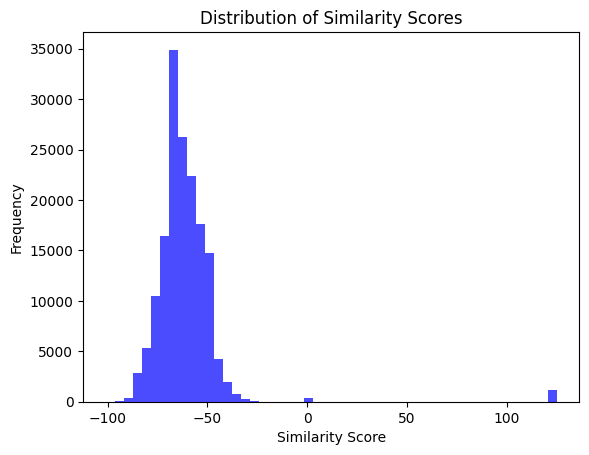

In [ ]:
# Generation of the matrices

import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('voting_records_Sample_with_similar_entries.csv', index_col=0)


W = np.zeros((400, 400)) # Initialize the weighted matrix

# Function to determine similarity
def vote_similarity(vote1, vote2):
    if pd.isna(vote1) or pd.isna(vote2):
        return 0
    return 1 if vote1 == vote2 else -1

# Iterate over each session (column)
for col in df.columns:

    M = np.zeros((400, 400)) # Initial matrix M for every session that will later on be added to W

    #Change M according to similarity, with values either 0, 1 or -1
    for i in range(400):
        for j in range(i + 1, 400):  # Iterate only over the upper triangular part

            if M[i][j] ==0: # calculate one of them once bcz they are the same.
              similarity = vote_similarity(df.iloc[i][col], df.iloc[j][col])
              M[i, j] = similarity
              M[j, i] = similarity # this is similar to the one before so we try to not compute it again for time complexity

    # Update the weighted matrix W by adding M
    W += M

# Set all diagonal entries of W to 0
np.fill_diagonal(W, 0)

# Convert the weighted matrix W to a DataFrame
W_df = pd.DataFrame(W, index=df.index, columns=df.index)

# Save the DataFrame as a CSV file
weighted_matrix_csv_path = 'weighted_matrix.csv'
W_df.to_csv(weighted_matrix_csv_path)

# Display a sample of the weighted matrix DataFrame
print("Sample of the Weighted Matrix DataFrame:")
print(W_df.head())

# Display the CSV file path
print(f"\nWeighted Matrix CSV file saved at: {weighted_matrix_csv_path}")

import matplotlib.pyplot as plt

# Plot the histogram of similarity scores
plt.hist(W.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Get the G matrix where each entry will be representing the most similar legislator for each one.

import pandas as pd
import numpy as np

# Load the weighted matrix W
W_df = pd.read_csv('weighted_matrix.csv', index_col=0)
W = W_df.values

# Generate matrix G based on the specified conditions
G = np.zeros_like(W)

# Populate matrix G based on the specified conditions
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        if i != j:  # Exclude diagonal entries
            if W[i, j] == np.max(W[i, :]):
                G[i, j] = 1

# Convert the matrix G to a DataFrame
G_df = pd.DataFrame(G, index=W_df.index, columns=W_df.columns)

# Save the DataFrame as a CSV file
G_matrix_csv_path = 'matrix_G.csv'
G_df.to_csv(G_matrix_csv_path)

# Display a sample of the G matrix DataFrame
print("Sample of the Matrix G DataFrame:")
print(G_df.head())

# Display the CSV file path
print(f"\nMatrix G CSV file saved at: {G_matrix_csv_path}")

import pandas as pd

# Iterate over each column and print unique values
for column in G_df.columns:
    unique_values = G_df[column].unique()
    print(f"Unique values in column '{column}':") # we can see the '1' in the unique values - indicating the presence of similaritiess in the votes.
    print(unique_values)
    print()



Sample of the Matrix G DataFrame:
     1    2    3    4    5    6    7    8    9   10  ...  391  392  393  394  \
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   395  396  397  398  399  400  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  
5  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 400 columns]

Matrix G CSV file saved at: matrix_G.csv
Unique values in column '1':
[0.]

Unique values in column '2':
[0.]

Unique values in column '3':
[0.]

Unique values in column '4':
[0.]

Unique values in column '5':
[0.]

Unique values in column '6':
[0.]

Uniqu

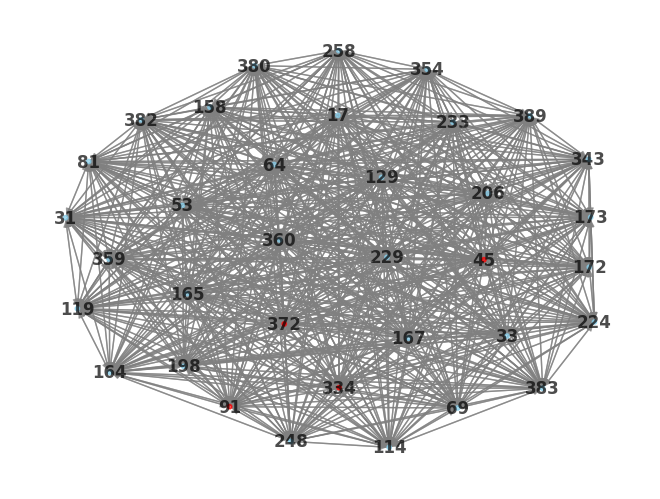

35
Table of Legislators with Conviction Information:
    Legislator ID  Convicted
0              17          1
1              31          1
2              33          1
3              53          1
4              64          1
5              69          1
6              81          1
7             114          1
8             119          1
9             129          1
10            158          1
11            164          1
12            165          1
13            167          1
14            172          1
15            173          1
16            198          1
17            206          1
18            224          1
19            229          1
20            233          1
21            248          1
22            258          1
23            343          1
24            354          1
25            359          1
26            360          1
27            380          1
28            382          1
29            383          1
30            389          1


In [11]:
# Graphs

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('matrix_G.csv', index_col=0)

# Create a directed graph
G = nx.DiGraph()

# Iterate over rows and columns of the DataFrame
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i, j] == 1:
            G.add_edge(i, j)

# Define nodes to be already convicted
convicted_nodes = [334, 372, 91, 45]

# Create a plot of the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms

# Draw the graph with different colors for convicted nodes
nx.draw(G, pos, with_labels=True, node_color=['red' if node in convicted_nodes else 'skyblue' for node in G.nodes()], font_color='black', font_weight='bold', edge_color='gray', alpha=0.7, node_size=10)
plt.show()

print(G.number_of_nodes())  # 35 nodes similar

legislators_df = pd.DataFrame({
    'Legislator ID': [node for node in G.nodes if node not in convicted_nodes],
    'Convicted': 1,  # Mark all as convicted
})

# Display the table
print("Table of Legislators with Conviction Information:")
print(legislators_df)

csv_file_path = 'legislators_info.csv'
legislators_df.to_csv(csv_file_path, index=False)  # Save this to compare our predictions

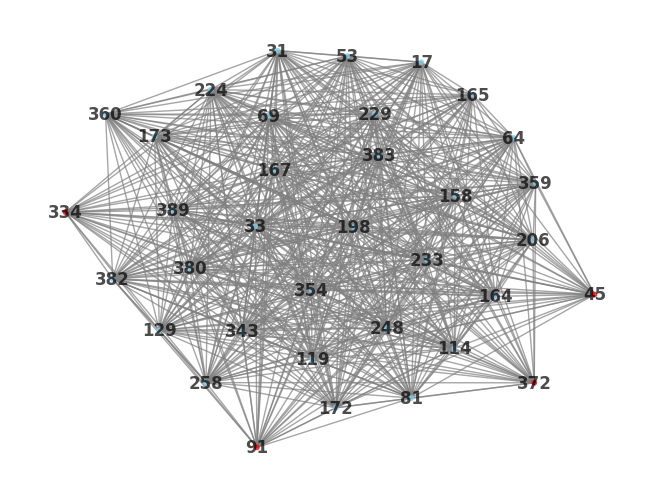

Table of Connected Nodes:
    Legislator ID  Connected to Convicted
0             129                       1
1             258                       1
2             389                       1
3              17                       1
4             158                       1
5              31                       1
6              33                       1
7             164                       1
8             167                       1
9             172                       1
10             53                       1
11             64                       1
12             69                       1
13            198                       1
14            206                       1
15             81                       1
16            343                       1
17            224                       1
18            354                       1
19            229                       1
20            359                       1
21            233                       1
22      

In [18]:
# Steps to implement the Cosine technique

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt

# Load the weighted matrix W
W_df = pd.read_csv('weighted_matrix.csv', index_col=0)
W = W_df.values

# Convert the graph to an undirected graph
undirected_G = G.to_undirected()

# Remove all existing links between convicted labeled nodes
convicted_nodes = [334, 372, 91, 45]  # Replace with the actual convicted nodes
for node in convicted_nodes:
    neighbors = list(undirected_G.neighbors(node))
    undirected_G.remove_edges_from([(node, neighbor) for neighbor in neighbors])

# Compute cosine similarity between the 31 nodes and the convicted nodes
# Assume 'nodes_to_predict' contains the IDs of the 31 nodes
nodes_to_predict = [node_id for node_id in undirected_G.nodes if node_id not in convicted_nodes]

# Identify the rows corresponding to the nodes to predict
rows_to_predict = W_df.loc[nodes_to_predict].values

# Identify the rows corresponding to the convicted nodes
rows_convicted = W_df.loc[convicted_nodes].values

# Compute cosine similarity
cosine_similarities_to_predict = cosine_similarity(rows_to_predict, rows_convicted)

# Consider a threshold for similarity
cosine_similarity_threshold = 0.8

# Identify nodes with high cosine similarity to convicted nodes
predicted_links = np.where(cosine_similarities_to_predict > cosine_similarity_threshold)

# Reconnect nodes in the graph based on predicted links
for i, j in zip(predicted_links[0], predicted_links[1]):
    undirected_G.add_edge(nodes_to_predict[i], convicted_nodes[j])

# Display the modified graph
pos = nx.spring_layout(undirected_G)
nx.draw(undirected_G, pos, with_labels=True, node_color=['red' if node in convicted_nodes else 'skyblue' for node in undirected_G.nodes()], font_color='black', font_weight='bold', edge_color='gray', alpha=0.7, node_size=10)
plt.show()

# Extract nodes linked to the convicted nodes
connected_nodes = [neighbor for convicted_node in convicted_nodes for neighbor in undirected_G.neighbors(convicted_node)]
connected_nodes = list(set(connected_nodes))  # Remove duplicates

# Create a DataFrame with connected nodes
connected_nodes_df = pd.DataFrame({
    'Legislator ID': connected_nodes,
    'Connected to Convicted': 1,
})

# Display the table
print("Table of Connected Nodes:")
print(connected_nodes_df)

csv_file_path = 'connected_nodes_info.csv'
connected_nodes_df.to_csv(csv_file_path, index=False)  # Save this to compare our predictions


In [27]:
import pandas as pd

L = pd.read_csv('legislators_info.csv')
C = pd.read_csv('connected_nodes_info.csv')

# Assuming the actual column names are 'col_name' in both DataFrames
s = 0
for i in C['Legislator ID']:
    # Convert to string and remove leading/trailing whitespaces for comparison
    i = str(i).strip()
    if i in L['Legislator ID'].astype(str).str.strip().tolist():
        s += 1

result = s / 31 # nb of similar IDs over total number of neighbors.
print(result)



0.8709677419354839
